In [1]:
import pandas as pd 
import numpy as np 
import os
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from sklearn.model_selection import cross_val_score

#from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
path = "."
fname = os.path.join(path, "edu_classification.csv")
df = pd.read_csv(fname)

In [3]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,Race,Education,rowNumber,tag,salarygroup,gender
0,IBM,Software Engineer,78000,"Toronto, ON, Canada",4.0,4.0,Two Or More,Bachelor's Degree,75325,Full Stack,b. 50-100k,Male
1,EPAM Systems,Software Engineer,42000,"Kaliningrad, KN, Russia",10.0,1.0,White,Master's Degree,50462,Web Development (Front-End),a. <50k,Male
2,Five Rings,Software Engineer,330000,"New York, NY",1.0,0.0,NaN,NaN,56390,ML / AI,g. 300-350k,Female
3,Facebook,Software Engineering Manager,458000,"Seattle, WA",15.0,0.0,NaN,Master's Degree,32194,Site Reliability (SRE),j. 450-500k,Female
4,Bloomberg,Software Engineer,163000,"London, EN, United Kingdom",10.0,4.0,NaN,Master's Degree,22677,Distributed Systems (Back-End),d. 150-200k,Male


## Encode categorical data

In [4]:
data = df[['title', 'totalyearlycompensation', 'yearsofexperience', 'Education', 'tag', 'gender']].copy()

In [5]:
#encode titles
titles = [[x] for x in data.title]
title_encoder = OneHotEncoder(sparse=False)
ohe_titles = title_encoder.fit_transform(titles)
ohe_title_df = pd.DataFrame(data = ohe_titles, columns = title_encoder.get_feature_names(['title']))
data = pd.concat([data, ohe_title_df], axis = 1)

In [6]:
#encode tag
tags = [[x] for x in data.tag]
tag_encoder = OneHotEncoder(sparse=False)
ohe_tags = tag_encoder.fit_transform(tags)
ohe_tag_df = pd.DataFrame(data = ohe_tags, columns = tag_encoder.get_feature_names(['tag']))
data = pd.concat([data, ohe_tag_df], axis = 1)

In [7]:
#encode gender 
gender = [[x] for x in data.gender]
gender_encoder = OneHotEncoder(sparse=False)
ohe_gender = gender_encoder.fit_transform(gender)
ohe_gender_df = pd.DataFrame(data = ohe_gender, columns = gender_encoder.get_feature_names(['gender']))
data = pd.concat([data, ohe_gender_df], axis = 1)

In [8]:
data.describe()

,totalyearlycompensation,yearsofexperience,title_Business Analyst,title_Data Scientist,title_Hardware Engineer,title_Human Resources,title_Management Consultant,title_Marketing,title_Mechanical Engineer,title_Product Designer,...,tag_Other,tag_Production,tag_Security,tag_Site Reliability (SRE),tag_Testing (SDET),tag_Web Development (Front-End),tag_iOS,gender_Female,gender_Male,gender_Other
count,5.386000e+04,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,...,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000
mean,2.176134e+05,7.072087,0.009655,0.033049,0.024248,0.002358,0.007204,0.006814,0.004066,0.020219,...,0.031675,0.009413,0.022354,0.013739,0.023004,0.078518,0.021556,0.152488,0.838414,0.009098
std,1.404108e+05,5.775672,0.097784,0.178765,0.153820,0.048502,0.084570,0.082266,0.063637,0.140750,...,0.175134,0.096565,0.147834,0.116408,0.149918,0.268988,0.145230,0.359497,0.368074,0.094948
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.890000e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.650000e+05,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,4.980000e+06,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Scale numerical data - total yearly comp + years of exp 

Text(0, 0.5, 'Frequency')

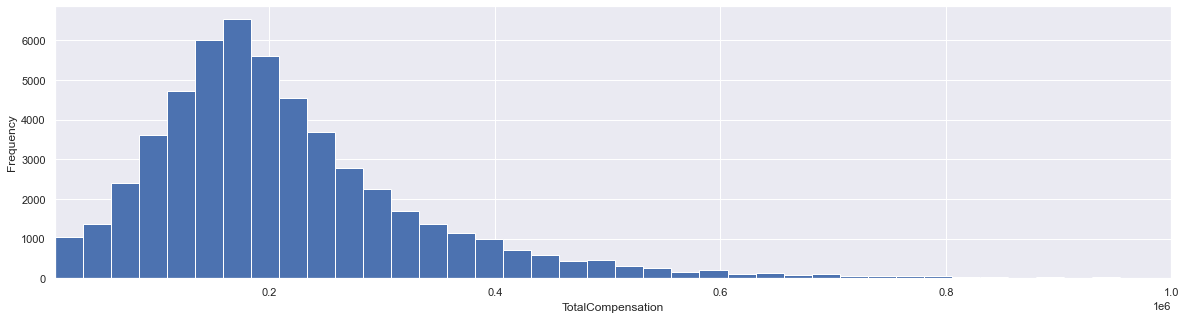

In [9]:
#Observe distirbution of total yearly compensation 
fig = plt.figure(figsize=(20,5))                                  
residuals_hist = plt.hist(data.totalyearlycompensation, bins = 200)
plt.xlim(xmin=10000, xmax = 1000000)
plt.xlabel('TotalCompensation')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

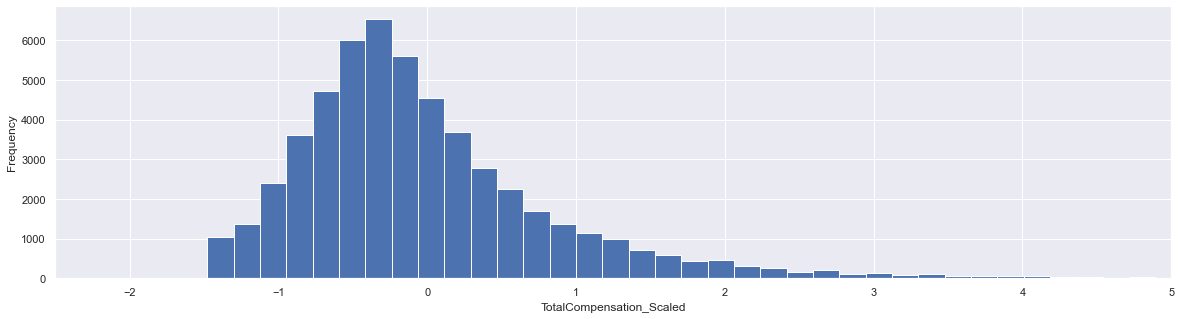

In [10]:
#follows a normal distribution -standardize variable 
tcomp = [[x] for x in data.totalyearlycompensation]
scaler = StandardScaler()
tcomp_scaled = scaler.fit_transform(tcomp)
tcomp_scaled_df = pd.DataFrame(data = tcomp_scaled, columns = ['tcomp_scaled'])
data = pd.concat([data, tcomp_scaled_df], axis = 1)

#plot y-residuals
fig = plt.figure(figsize=(20,5))                                  
residuals_hist = plt.hist(tcomp_scaled_df.tcomp_scaled, bins = 200)
plt.xlim(xmin=-2.5, xmax = 5)
plt.xlabel('TotalCompensation_Scaled')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

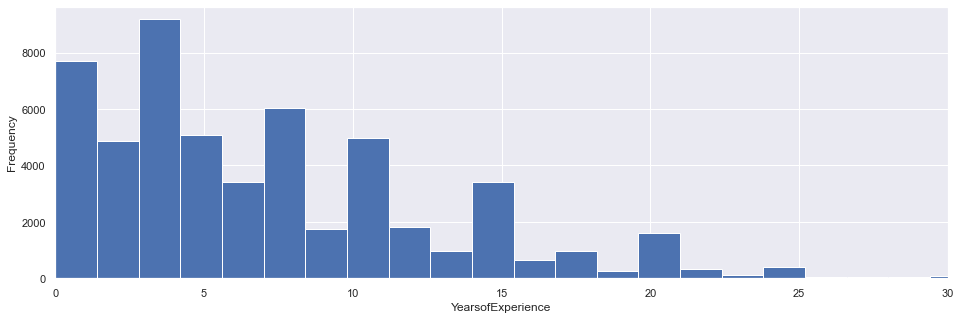

In [11]:
#Observe distribution of years of experience 
fig = plt.figure(figsize=(16,5))                                  
residuals_hist = plt.hist(data.yearsofexperience, bins = 30)
plt.xlim(xmin=0, xmax = 30)
plt.xlabel('YearsofExperience')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

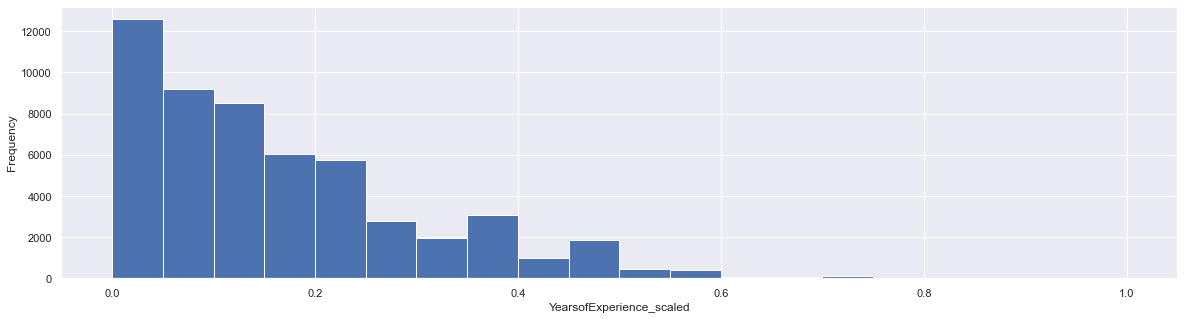

In [12]:
#follows a normal distribution -standardize variable 
yexp = [[x] for x in data.yearsofexperience]
mm_scaler = MinMaxScaler()
yexp_scaled = mm_scaler.fit_transform(yexp)
yexp_scaled_df = pd.DataFrame(data = yexp_scaled, columns = ['yexp_scaled'])
data = pd.concat([data, yexp_scaled_df], axis = 1)

#plot y-residuals
fig = plt.figure(figsize=(20,5))                                  
residuals_hist = plt.hist(yexp_scaled_df.yexp_scaled, bins = 20)
#plt.xlim(xmin=-2.5, xmax = 5)
plt.xlabel('YearsofExperience_scaled')
plt.ylabel('Frequency')

In [14]:
#Encode education
edu_mapping = { "Highschool": 1,
               "Some College": 2,
               "Bachelor's Degree": 3,
               "Master's Degree": 4,
               "PhD": 5 }
data['edu_encoded'] = data['Education'].map(edu_mapping).fillna(-1)
data

,title,totalyearlycompensation,yearsofexperience,Education,tag,gender,title_Business Analyst,title_Data Scientist,title_Hardware Engineer,title_Human Resources,...,tag_Site Reliability (SRE),tag_Testing (SDET),tag_Web Development (Front-End),tag_iOS,gender_Female,gender_Male,gender_Other,tcomp_scaled,yexp_scaled,edu_encoded
0,Software Engineer,78000,4.0,Bachelor's Degree,Full Stack,Male,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.994331,0.095238,3.0
1,Software Engineer,42000,10.0,Master's Degree,Web Development (Front-End),Male,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.250724,0.238095,4.0
2,Software Engineer,330000,1.0,NaN,ML / AI,Female,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.800420,0.023810,-1.0
3,Software Engineering Manager,458000,15.0,Master's Degree,Site Reliability (SRE),Female,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.712039,0.357143,4.0
4,Software Engineer,163000,10.0,Master's Degree,Distributed Systems (Back-End),Male,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.388958,0.238095,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53855,Software Engineer,114000,2.0,Master's Degree,Android,Male,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.737938,0.047619,4.0
53856,Software Engineer,228000,3.0,NaN,ML / AI,Male,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.073973,0.071429,-1.0
53857,Hardware Engineer,50000,6.0,Master's Degree,Full Stack,Other,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.193747,0.142857,4.0
53858,Product Designer,174000,6.0,NaN,Web Development (Front-End),Female,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.310616,0.142857,-1.0


In [16]:
data[data.edu_encoded != -1].to_csv('Reg_trueEduValue.csv')

In [14]:
data.describe()

,totalyearlycompensation,yearsofexperience,title_Business Analyst,title_Data Scientist,title_Hardware Engineer,title_Human Resources,title_Management Consultant,title_Marketing,title_Mechanical Engineer,title_Product Designer,...,tag_Site Reliability (SRE),tag_Testing (SDET),tag_Web Development (Front-End),tag_iOS,gender_Female,gender_Male,gender_Other,tcomp_scaled,yexp_scaled,edu_encoded
count,5.386000e+04,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,...,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,53860.000000,5.386000e+04,53860.000000,53860.000000
mean,2.176134e+05,7.072087,0.009655,0.033049,0.024248,0.002358,0.007204,0.006814,0.004066,0.020219,...,0.013739,0.023004,0.078518,0.021556,0.152488,0.838414,0.009098,-6.646084e-17,0.168383,1.215763
std,1.404108e+05,5.775672,0.097784,0.178765,0.153820,0.048502,0.084570,0.082266,0.063637,0.140750,...,0.116408,0.149918,0.268988,0.145230,0.359497,0.368074,0.094948,1.000009e+00,0.137516,2.328894
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.478629e+00,0.000000,-1.000000
25%,1.350000e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-5.883752e-01,0.071429,-1.000000
50%,1.890000e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.037857e-01,0.142857,-1.000000
75%,2.650000e+05,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.374883e-01,0.238095,4.000000
max,4.980000e+06,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.391784e+01,1.000000,5.000000


In [15]:
edu_df = data.loc[data.edu_encoded != -1].copy()

In [16]:
#try PCA? 

In [17]:
edu_df.columns

Index(['title', 'totalyearlycompensation', 'yearsofexperience', 'Education',
       'tag', 'gender', 'title_Business Analyst', 'title_Data Scientist',
       'title_Hardware Engineer', 'title_Human Resources',
       'title_Management Consultant', 'title_Marketing',
       'title_Mechanical Engineer', 'title_Product Designer',
       'title_Product Manager', 'title_Recruiter', 'title_Sales',
       'title_Software Engineer', 'title_Software Engineering Manager',
       'title_Solution Architect', 'title_Technical Program Manager',
       'tag_API Development (Back-End)', 'tag_Android', 'tag_Data',
       'tag_DevOps', 'tag_Distributed Systems (Back-End)', 'tag_Full Stack',
       'tag_ML / AI', 'tag_Mobile (iOS + Android)', 'tag_Networking',
       'tag_Other', 'tag_Production', 'tag_Security',
       'tag_Site Reliability (SRE)', 'tag_Testing (SDET)',
       'tag_Web Development (Front-End)', 'tag_iOS', 'gender_Female',
       'gender_Male', 'gender_Other', 'tcomp_scaled', 'yexp_scale

## Try k-fold with different classifiers

In [18]:
features = edu_df.columns[6:-1]
target = edu_df.columns[-1] 

In [19]:
X = edu_df[features]
y = edu_df[[target]].values

In [20]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20902, 36) (5226, 36) (20902, 1) (5226, 1)


In [22]:
classifiers = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    knnc(),
    GaussianNB(),
    svm.SVC(decision_function_shape='ovr')
    #,svm.SVC(decision_function_shape='ovo') #similar perf 

]
classifier_names = [
    'Logistic Regression' ,
    'RandomForest Classifier',
    'K nearest neighbors',
    'Guassian Naive Bayes',
    'SVM - one vs rest'
    #,'SVM - one vs one',
]

In [23]:
for clf, clf_name in zip(classifiers, classifier_names):
    time_start = time.time()
    cv_scores = cross_val_score(clf, X, np.ravel(y), cv=5)
    print(clf_name, ' mean accuracy: ',
          round(cv_scores.mean()*100, 3), 
          '% std: ', round(cv_scores.var()*100, 3),'%',
          'training time: ', round(time.time() - time_start, 2), 's'
         )

Logistic Regression  mean accuracy:  57.812 % std:  0.005 % training time:  9.68 s
RandomForest Classifier  mean accuracy:  53.376 % std:  0.001 % training time:  11.81 s
K nearest neighbors  mean accuracy:  54.784 % std:  0.003 % training time:  10.0 s
Guassian Naive Bayes  mean accuracy:  5.741 % std:  0.002 % training time:  0.17 s
SVM - one vs rest  mean accuracy:  58.305 % std:  0.005 % training time:  219.82 s


Logistic Regression and SVM have highest accuracy with default params during k-fold validation

## Logistic Regression : hyper parameter tuning

In [24]:
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [25]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

time_start = time.time()
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('time taken: ', time.time()-time_start, 's')

C:\Users\adcm172\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best: 0.580144 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.579187 (0.007587) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.579149 (0.007889) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.577962 (0.008370) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.579123 (0.007626) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.579047 (0.007773) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.577949 (0.008326) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.579110 (0.007644) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.579200 (0.007813) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.578077 (0.008357) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.579889 (0.008042) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.579927 (0.008052) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.578217 (0.008335) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.580131 (0.009026) with: 

Best: 0.580144 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}

## Support Vector Machines : hyper parameter tuning

In [26]:
#check if there's an issue, long-running

In [27]:
"""
# example of grid searching key hyperparametres for SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

time_start = time.time()

# define model and parameters
model = svm.SVC()#SVC()
kernel = ['poly'] #['poly', 'rbf', 'sigmoid']
C = [10]#, 1.0]# [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print('time taken: ', time.time()-time_start, 's')
"""
#None

'\n# example of grid searching key hyperparametres for SVC\nfrom sklearn.datasets import make_blobs\nfrom sklearn.model_selection import RepeatedStratifiedKFold\nfrom sklearn.model_selection import GridSearchCV\n#from sklearn.svm import SVC\n\ntime_start = time.time()\n\n# define model and parameters\nmodel = svm.SVC()#SVC()\nkernel = [\'poly\'] #[\'poly\', \'rbf\', \'sigmoid\']\nC = [10]#, 1.0]# [50, 10, 1.0, 0.1, 0.01]\ngamma = [\'scale\']\n\n# define grid search\ngrid = dict(kernel=kernel,C=C,gamma=gamma)\n#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\ncv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)\n\ngrid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=\'accuracy\',error_score=0)\ngrid_result = grid_search.fit(X, y)\n\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_resul

use logistic regression with: Best: 0.580144 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'} to impute values for education 

In [28]:
#split og data set to test/train 
all_edu = data.copy()
all_edu['row_type'] = all_edu['edu_encoded'].apply(lambda x: 'test' if x == -1 else 'train')

X_test = all_edu.loc[all_edu.row_type == 'test'][features]
X_train = all_edu.loc[all_edu.row_type == 'train'][features]
y_test = all_edu.loc[all_edu.row_type == 'test'][[target]].values
y_train = all_edu.loc[all_edu.row_type == 'train'][[target]].values

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 


(26128, 36) (27732, 36) (26128, 1) (27732, 1)


In [29]:
def display_results(y_pred, y_test):
    print("Predicted 1-5:", y_pred[0:5, 0])
    print("Actual 1-5:", y_test[0:5, 0])
    #count number of correct predictions
    y_diff = y_pred - y_test 
    temp = [y_diff[x][0] for x in range(0, len(y_diff))]
    correct = temp.count(0.0)
    print("Number of correct predictions: ", correct)
    print("Accuracy: {} % ".format(round((correct/len(temp))*100, 2)))

In [30]:
time_start = time.time()
lclf = LogisticRegression(solver='lbfgs',penalty='l2',C=0.01)
lclf.fit(X_train, np.ravel(y_train))
print('time taken: ', time.time()-time_start, 's')
y_pred = np.array([[x] for x in lclf.predict(X_train)])
display_results(y_pred, y_train)


time taken:  0.5774540901184082 s
Predicted 1-5: [3. 3. 4. 4. 3.]
Actual 1-5: [3. 4. 4. 4. 4.]
Number of correct predictions:  15190
Accuracy: 58.14 % 


In [31]:
edu_imp = np.array([[x] for x in lclf.predict(X_test)])
temp = all_edu.loc[all_edu.row_type == 'test'].copy()
temp['edu_imputed'] = edu_imp
temp.head()

,title,totalyearlycompensation,yearsofexperience,Education,tag,gender,title_Business Analyst,title_Data Scientist,title_Hardware Engineer,title_Human Resources,...,tag_Web Development (Front-End),tag_iOS,gender_Female,gender_Male,gender_Other,tcomp_scaled,yexp_scaled,edu_encoded,row_type,edu_imputed
2,Software Engineer,330000,1.0,NaN,ML / AI,Female,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.800420,0.023810,-1.0,test,4.0
5,Software Engineer,120000,2.0,NaN,Android,Female,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.695206,0.047619,-1.0,test,3.0
7,Software Engineer,152000,0.0,NaN,Full Stack,Female,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.467301,0.000000,-1.0,test,3.0
9,Technical Program Manager,150000,10.0,NaN,Data,Female,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.481545,0.238095,-1.0,test,4.0
10,Software Engineer,139000,8.0,NaN,Android,Female,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.559887,0.190476,-1.0,test,4.0


In [32]:
df_final = pd.concat([all_edu.loc[all_edu.row_type == 'train'], temp], axis = 0)
df_final.head()

,title,totalyearlycompensation,yearsofexperience,Education,tag,gender,title_Business Analyst,title_Data Scientist,title_Hardware Engineer,title_Human Resources,...,tag_Web Development (Front-End),tag_iOS,gender_Female,gender_Male,gender_Other,tcomp_scaled,yexp_scaled,edu_encoded,row_type,edu_imputed
0,Software Engineer,78000,4.0,Bachelor's Degree,Full Stack,Male,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.994331,0.095238,3.0,train,NaN
1,Software Engineer,42000,10.0,Master's Degree,Web Development (Front-End),Male,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,-1.250724,0.238095,4.0,train,NaN
3,Software Engineering Manager,458000,15.0,Master's Degree,Site Reliability (SRE),Female,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.712039,0.357143,4.0,train,NaN
4,Software Engineer,163000,10.0,Master's Degree,Distributed Systems (Back-End),Male,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,-0.388958,0.238095,4.0,train,NaN
6,Software Engineer,120000,6.0,Master's Degree,API Development (Back-End),Female,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-0.695206,0.142857,4.0,train,NaN


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53860 entries, 0 to 53858
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               53860 non-null  object 
 1   totalyearlycompensation             53860 non-null  int64  
 2   yearsofexperience                   53860 non-null  float64
 3   Education                           26128 non-null  object 
 4   tag                                 53860 non-null  object 
 5   gender                              53860 non-null  object 
 6   title_Business Analyst              53860 non-null  float64
 7   title_Data Scientist                53860 non-null  float64
 8   title_Hardware Engineer             53860 non-null  float64
 9   title_Human Resources               53860 non-null  float64
 10  title_Management Consultant         53860 non-null  float64
 11  title_Marketing                     53860

In [34]:
df_final['final_edu_val'] = None
df_final['final_edu_val'] = df_final.final_edu_val.fillna(df_final.edu_imputed).fillna(df_final.edu_encoded)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53860 entries, 0 to 53858
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               53860 non-null  object 
 1   totalyearlycompensation             53860 non-null  int64  
 2   yearsofexperience                   53860 non-null  float64
 3   Education                           26128 non-null  object 
 4   tag                                 53860 non-null  object 
 5   gender                              53860 non-null  object 
 6   title_Business Analyst              53860 non-null  float64
 7   title_Data Scientist                53860 non-null  float64
 8   title_Hardware Engineer             53860 non-null  float64
 9   title_Human Resources               53860 non-null  float64
 10  title_Management Consultant         53860 non-null  float64
 11  title_Marketing                     53860

In [35]:
df_final.to_csv('edu_imputed.csv')